# Visualizing FITS Astronomy Data | Astronomy Research Data Analysis

---

#What is Image ??

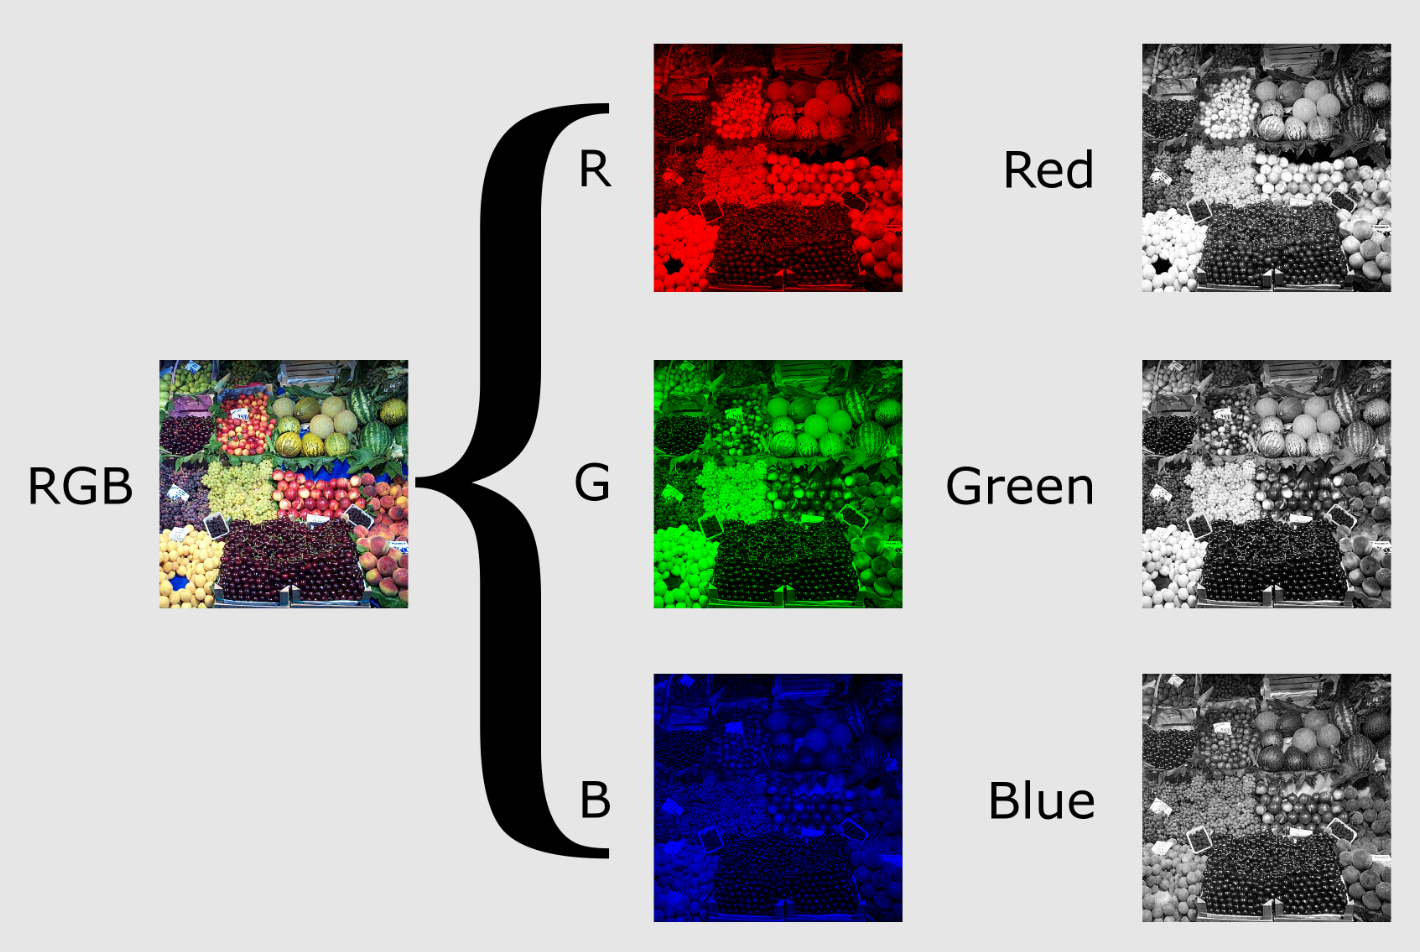

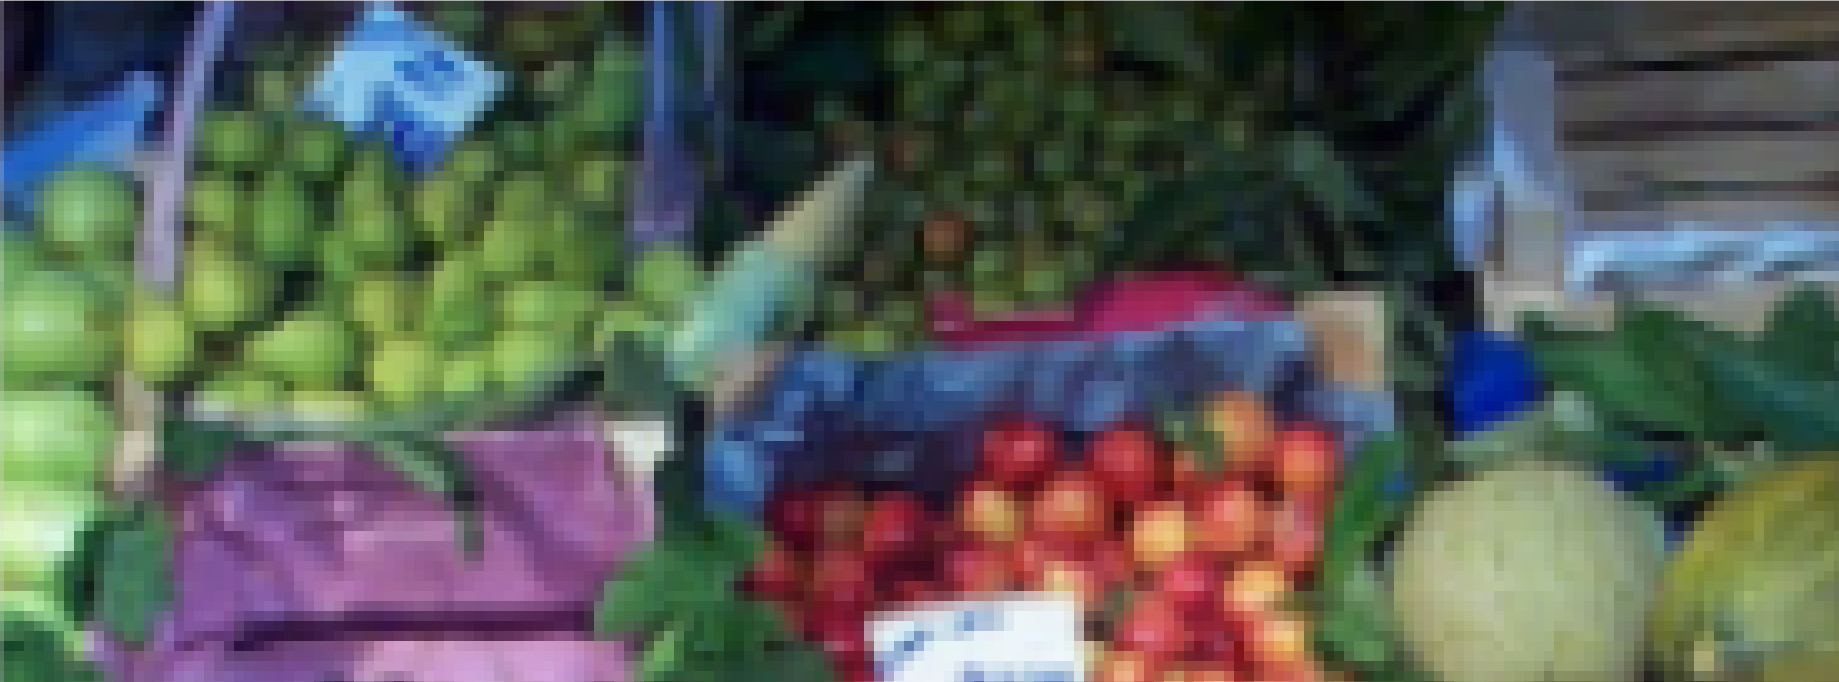

#What is FITS IMAGE ??

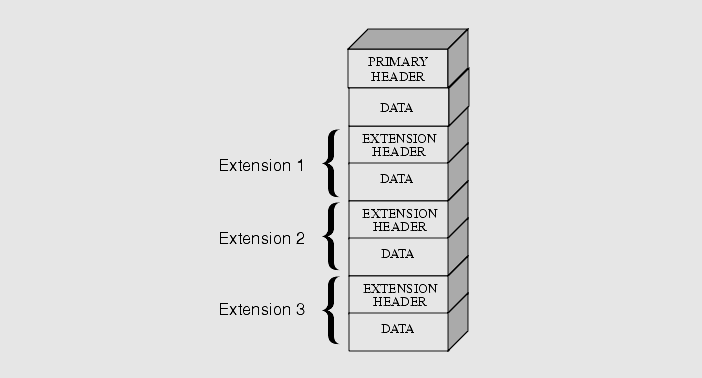

## Lets have M31 Galaxy fits Data from Astroquery

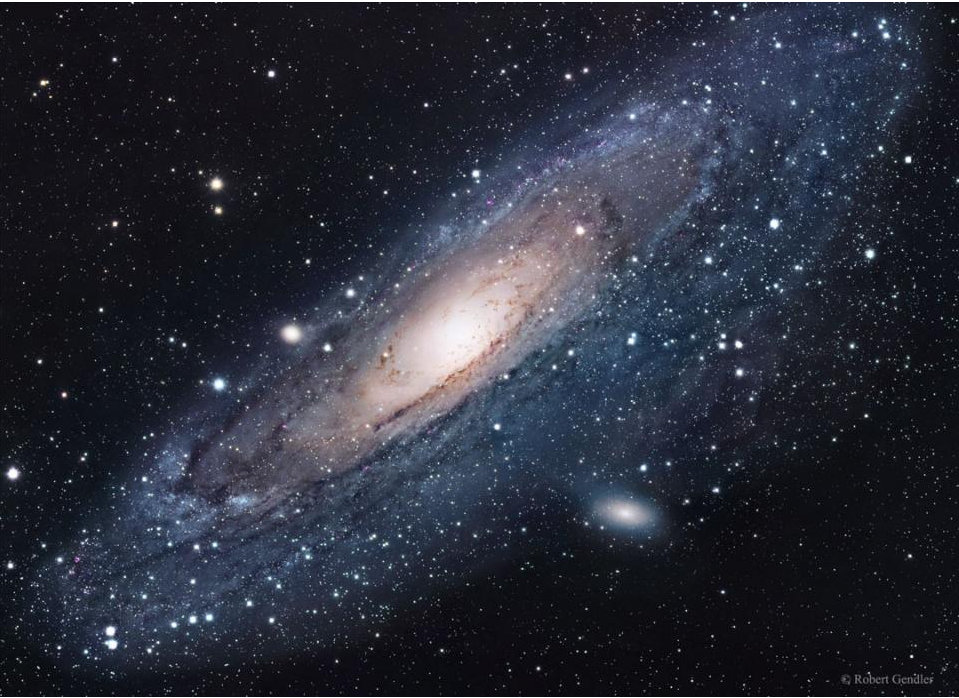

### 1) Installing Astroquery

In [1]:
# ! pip install astroquery

### 2) Import necessary Libraries and Modules

In [2]:
import matplotlib.pyplot as plt

### 3) Query for Astronomical Survey Images centered on target name

SkyView Query Form:- https://skyview.gsfc.nasa.gov/current/cgi/query.pl

<img src='http://www.messier-objects.com/wp-content/uploads/2015/04/Messier-32-Messier-31-and-Messier-110.jpg' width = 50%>

In [3]:
from astroquery.skyview import SkyView

In [4]:
# Get the Andromeda galaxy data (M31) from SDSSg Survey using SkyView
# Returns a list of lists, so get the first item using [0][0] 
hdu_raw = SkyView.get_images("M31", "SDSSg")
hdu_raw

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001C958EB8190>]]

In [5]:
hdu = hdu_raw[0][0]
hdu, type(hdu) 

(<astropy.io.fits.hdu.image.PrimaryHDU at 0x1c958eb8190>,
 astropy.io.fits.hdu.image.PrimaryHDU)

### 4) Get into the data

In [6]:
# Get the Metadata using header
M31_header = hdu.header 
print(type(M31_header))
M31_header

<class 'astropy.io.fits.header.Header'>


SIMPLE  =                    T / Written by SkyView Tue Jan 23 12:18:51 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [7]:
# Get the pixels data from HDU
M31_Pixels = hdu.data
# Check the type - must be numpy array
type(M31_Pixels)

numpy.ndarray

In [8]:
# Check the shape of the array
M31_Pixels.shape

(300, 300)

In [9]:
M31_Pixels

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [10]:
M31_Pixels[0][0], M31_Pixels[150][150]

(5.4453125, 148.5)

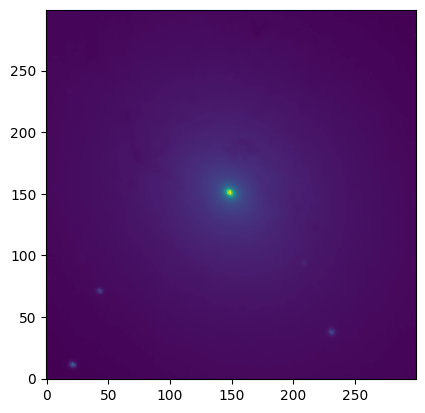

In [11]:
# Plot the image
plt.imshow(M31_Pixels,
           cmap='viridis', # 'gray'
           origin='lower');

In [12]:
import astropy.units as u

In [13]:
hdu = SkyView.get_images("M31", "DSS2 Blue",
                         pixels = 600, # more data pixels (600x600) 
                         radius = 150 * u.arcmin)[0][0]  # zoom out for wider view

In [14]:
hdu

In [15]:
M31_DSS2_Blue_Pixels = hdu.data
M31_DSS2_Blue_Pixels.shape

(600, 600)

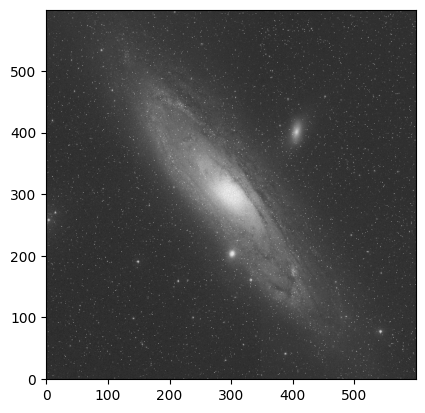

In [16]:
plt.imshow(M31_DSS2_Blue_Pixels, 
           cmap='gray', # 'viridis'
           origin='lower');

### 5) Learn to create your own FITS file

In [17]:
# Import fits from io module of astropy
from astropy.io import fits

In [18]:
'''Steps to prepare data for FITS file'''

# 1) Create HDUList() to store different HDUs
hdulist = fits.HDUList()
print(hdulist)

# 2) Create the PrimaryHDU()
hdu1 = fits.PrimaryHDU()
print(hdu1)

# 3) Add Pixels data
hdu1.data = M31_Pixels
print(hdu1.data)

# 4) Add Meta data
hdu1.header = M31_header
print(hdu1.header[:25])

# 5) Append this Primary HDU to the HDU List
hdulist.append(hdu1)
print(hdulist)

# 6) Generate the FITS data
hdulist.writeto('Dummy_FITS_file.fits', overwrite=True)

[]
[[5.4453125 5.453125  5.4453125 ... 7.4609375 7.515625  7.4140625]
 [5.4375    5.453125  5.421875  ... 7.625     7.4453125 7.4453125]
 [5.4765625 5.359375  5.4609375 ... 7.4375    7.5625    7.46875  ]
 ...
 [7.3984375 7.3984375 7.546875  ... 5.53125   5.671875  5.7578125]
 [7.46875   7.6171875 7.5859375 ... 5.6640625 5.671875  5.5625   ]
 [7.53125   7.5078125 7.5859375 ... 5.53125   5.59375   5.5546875]]
SIMPLE  =                    T / Written by SkyView Tue Jan 23 12:18:51 EST 2024BITPIX  =                  -32 / 4 byte floating point                          NAXIS   =                    2 / Two dimensional image                          NAXIS1  =                  300 / Width of image                                 NAXIS2  =                  300 / Height of image                                CRVAL1  =              10.6847 / Reference longitude                            CRVAL2  =              41.2688 / Reference latitude                             RADESYS = 'FK5     '         

* Like this you can add as many HDU (different types) to create your own complete fits file!


In [19]:
# Open the FITS data generated by you!
My_fits = fits.open('Dummy_FITS_file.fits')

In [20]:
# Starting by checking info
My_fits

In [21]:
# What's inside first index of our FITS data?
My_fits[0]

In [22]:
# Check the header info
My_fits[0].header[:19]

SIMPLE  =                    T / Written by SkyView Tue Jan 23 12:18:51 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [23]:
# Check the pixels using .data
My_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [24]:
# Store it in a variable
dummy_data_var = My_fits[0].data

In [25]:
# Get the shape
dummy_data_var.shape

(300, 300)

In [26]:
# Get the type of the variable
type(dummy_data_var)

numpy.ndarray

##  Pixel Scaling on M31 Data

In [27]:
# Import necessary libraries to get started with Pixel Scaling
import numpy as np

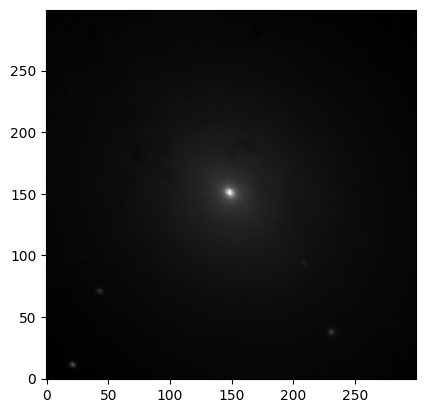

In [28]:
# Visualizing M31_Pixels once again
plt.imshow(M31_Pixels, cmap='gray', origin='lower');

In [29]:
# Printing the value of pixels at the Center of Andromeda Galaxy
M31_Pixels[150:152, 150:152]

array([[148.5 , 109.75],
       [135.25, 126.5 ]], dtype='>f4')

In [30]:
# Check some statistics (min, max, mean, median, std) of the data using numpy
print('Sumarray Statistics of M31 Pixels:-')
print(f'Minimum: {np.min(M31_Pixels)}')
print(f'Maximum: {np.max(M31_Pixels)}')
print(f'Average: {np.mean(M31_Pixels)}')
print(f'Median : {np.median(M31_Pixels)}')
print(f'Std    : {np.std(M31_Pixels)}') 

Sumarray Statistics of M31 Pixels:-
Minimum: 5.359375
Maximum: 178.0
Average: 13.329444885253906
Median : 11.5625
Std    : 6.3922271728515625


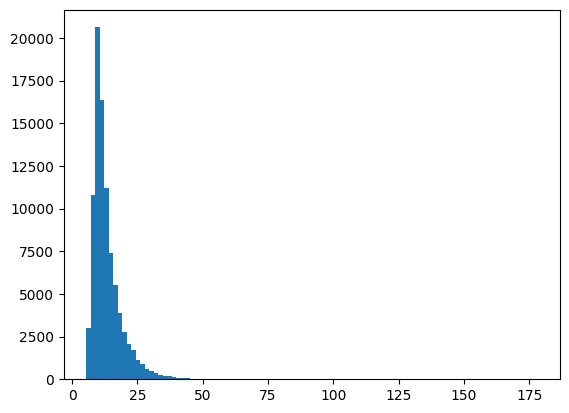

In [31]:
# Plot the histogram distribution (convert array to 1D)
plt.hist(M31_Pixels.flat, bins=100)
plt.show() 

### 1) Intensity Normalization Or Linear Scaling Or Min Max Scaling

<img src='https://playfairdata.com/wp-content/uploads/2022/05/6.-minmax-calc.png' width=25%>

In [32]:
# A Common Function that will be used to plot the scaled pixel arrays
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off') 

In [33]:
def compare_pixels(scaled_array, title):
  plt.subplot(1, 2, 1)
  plot_pixels(M31_Pixels, title='Original Image', color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show() 

In [71]:
def compare_pixels_2 (array_1, array_2, title_1, title_2):
  plt.subplot(1, 2, 1)
  plot_pixels(array_1, title=title_1, color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(array_2, title=title_2, color='royalblue')
  plt.tight_layout()
  plt.show() 

In [34]:
# Define a function to normalize
def minmax_scaling(pixel_array):
  numerator = pixel_array - np.min(pixel_array)            # array
  denominator = np.max(pixel_array) - np.min(pixel_array)  # number
  scaled_image = numerator / denominator                   # array
  return scaled_image

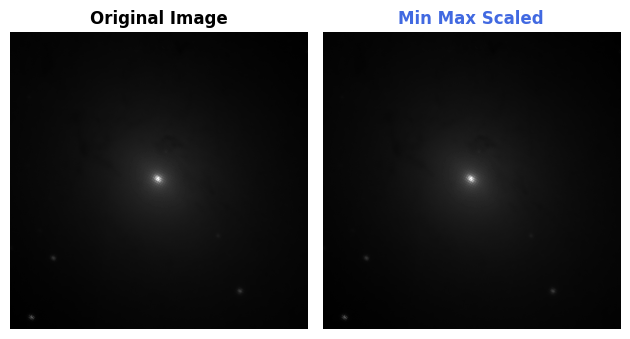

In [35]:
# Normalize the M31 data and visualize it!
minmax_array = minmax_scaling(M31_Pixels)
compare_pixels(minmax_array, title='Min Max Scaled') 

### 2) Standardization Or Z scaling

<img src='https://tse2.mm.bing.net/th?id=OIP.aU-q_bfzwe1ObWyaU3CReQAAAA&pid=Api&P=0&h=180' width=15%>

In [36]:
# A function to standardize (zero mean unit variance)
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

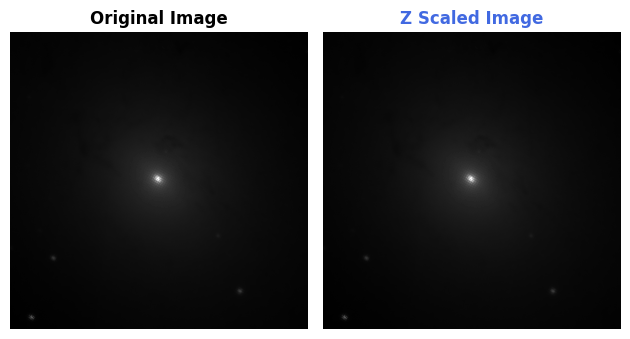

In [37]:
# Visualize the stardidize M31 data
zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array, title='Z Scaled Image') 

### 3) Log Normalization

In [38]:
# Log Normalization is simply the log of pixels! Create a function for the same!
def log_normalization(pixel_array):
  return np.log(pixel_array)

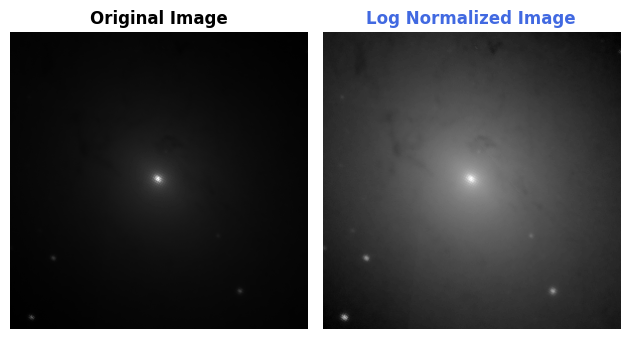

In [39]:
# Visualize the log normalization on M31 data
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image') 

### 4) Create a Histogram Distribution of Pixels of the best output so far!

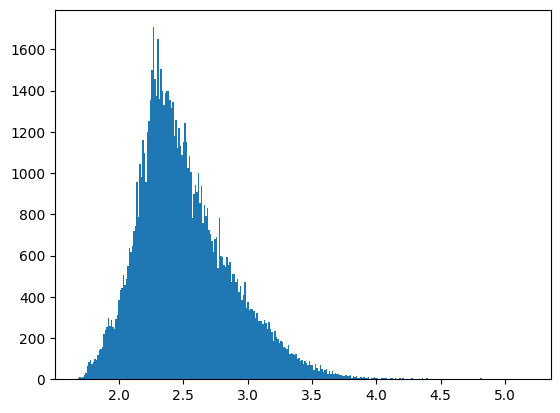

In [40]:
# Let's proceed with the log normalization!
plt.hist(log_norm_array.flat, bins=300)
plt.show() 

In [41]:
# Get the shape
log_norm_array.shape

(300, 300)

## 5) Square Root


In [42]:
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

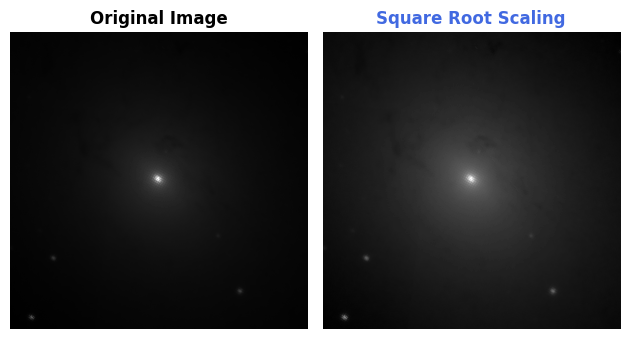

In [43]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array, title='Square Root Scaling')

#astropy.visualization Modules

### ZScaleInterval

In [44]:
# Get the ZScaleInterval from visualization module of astropy
# Clip all pixels to min and max values
from astropy.visualization import ZScaleInterval

In [45]:
# Create the object for ZScaleInterval
z = ZScaleInterval()

In [46]:
# Get min and max values of the M31 data
z1, z2 = z.get_limits(log_norm_array)

In [47]:
# Check z1 and z2
print(f'Minimum (orig)    = {log_norm_array.min()}')
print(f'Maximum (orig)    = {log_norm_array.max()}')
print(f'Minimum (z scale) = {z1}')
print(f'Maximum (z scale) = {z2}')

Minimum (orig)    = 1.678847312927246
Maximum (orig)    = 5.181783676147461
Minimum (z scale) = 1.6889997720718384
Maximum (z scale) = 4.447910199027215


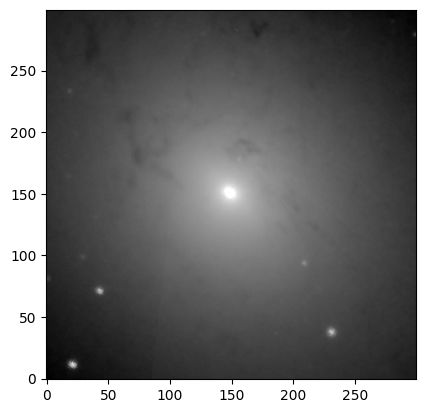

In [48]:
# Plot the M31 data using this interval
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show() 

In [49]:
img

In [50]:
# Get the array created from the above cell
# "unsamped=True" keeps the image dimensions exactly the same, except the channels
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [51]:
# shape - check the channels
image_array.shape, log_norm_array.shape

((300, 300, 4), (300, 300))

**Note:** Red, Green, Blue, and Alpha channels makes up a 4 channel image

### Change 4 channel image to  grayscale (1 channel)

In [52]:
# Import cv2 library - doesn't need installation using google colab
import cv2

In [53]:
# Convert 4 channel image to grayscale image (1 channel)
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY) # cv2 used BGR, not RGB

In [54]:
# Check if channels are set to 3 or 4 now
gray_array.shape

(300, 300)

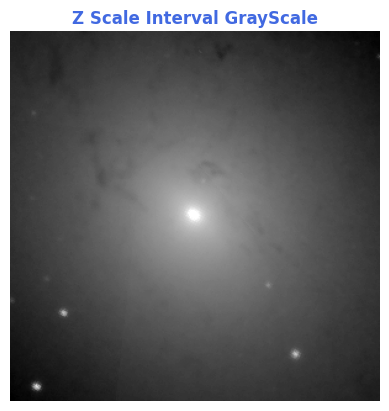

In [55]:
# Visualize it
plot_pixels(gray_array, title='Z Scale Interval GrayScale', color='royalblue') 

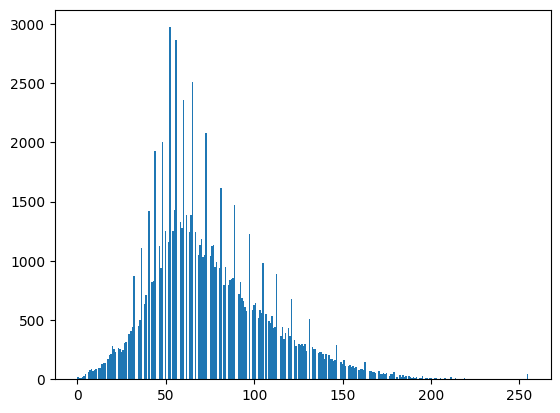

In [56]:
# Histogram Visualization
plt.hist(gray_array.flat, bins=300)
plt.show()

In [57]:
# Store grayscale in a new variable (will be using it later)
grayscale_zint_array = gray_array

# Denoising using Gaussian

It is technically Blurring the image by removing noises...Which is prerequisite to many filters and this is known as Gaussian Smoothing.

**<u>Convolution</u>:-**       
<img src='https://miro.medium.com/max/1400/1*O06nY1U7zoP4vE5AZEnxKA.gif' width=50%>

In [58]:
# We will need convolution 2D filter from Scipy's signal module
from scipy.signal import convolve2d

In [59]:
# Generate your kernel/filter
import numpy as np
kernel = np.ones((3,3))/9

In [60]:
# Let's see how it looks
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [61]:
# Create a gaussian kernel
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8,  1/4, 1/8],
                            [1/16, 1/8, 1/16]])
gaussian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

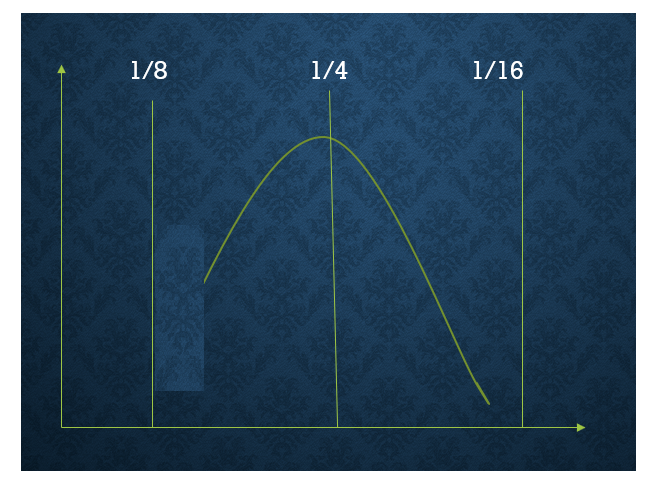

In [69]:
# Get the convolution done using our kernel
convolved_image = convolve2d(M31_Pixels, kernel, mode='same')

M31_Pixels.shape, convolved_image.shape

((300, 300), (300, 300))

In [63]:
# Convolution done using gaussian kernel
gaussian_convolved_image = convolve2d(M31_Pixels, gaussian_kernel, mode='same') 

In [73]:
# Copied from above
def compare_pixels_2 (array_1, array_2, title_1, title_2):
  plt.subplot(1, 2, 1)
  plot_pixels(array_1, title=title_1, color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(array_2, title=title_2, color='royalblue')
  plt.tight_layout()
  plt.show() 

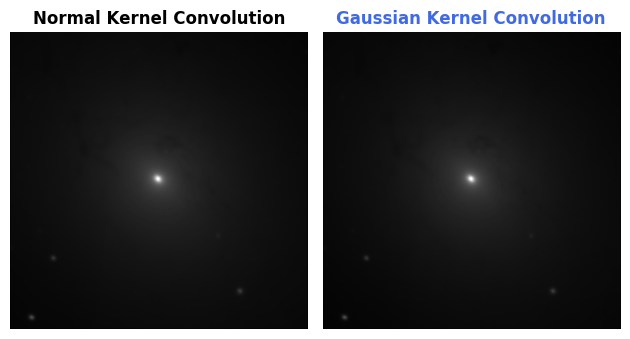

In [74]:
compare_pixels_2 (convolved_image, gaussian_convolved_image, 'Normal Kernel Convolution', 'Gaussian Kernel Convolution') 

In [66]:
# Using grayscalel of M31 data to convolve with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode='same')

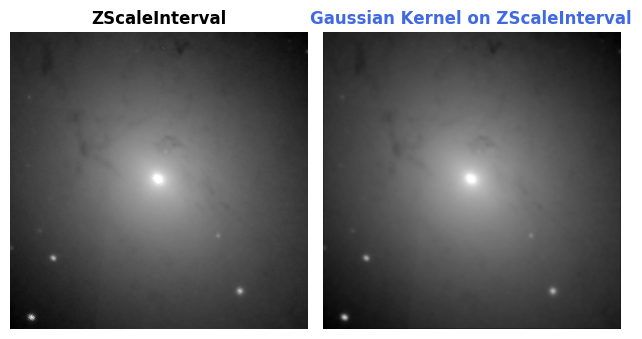

In [75]:
compare_pixels_2 (grayscale_zint_array, convolved_grayscale, 'ZScaleInterval', 'Gaussian Kernel on ZScaleInterval') 

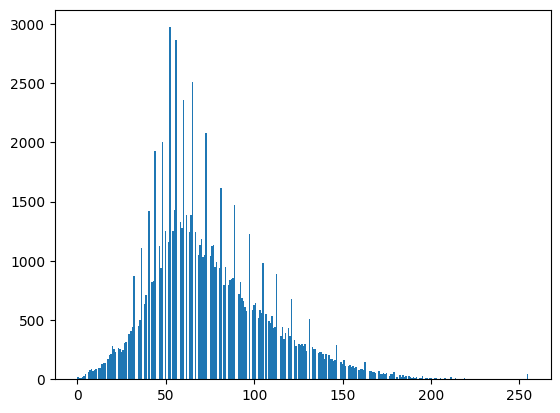

In [77]:
# Get the histogram
plt.hist(grayscale_zint_array.flat, bins=300)
plt.show()

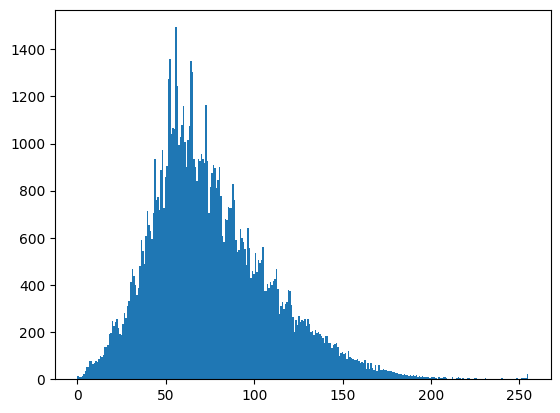

In [76]:
# Get the histogram (much better)
plt.hist(convolved_grayscale.flat, bins=300)
plt.show()

## Enhancing the Linear Features on M31
Take a look onto different available filters in skimage:-
https://scikit-image.org/docs/stable/api/skimage.filters.html

In [81]:
# Create spectral list to use later
SPECTRAL_LIST = ["gray", "jet", "turbo", "hot", "prism", "nipy_spectral"]

In [80]:
# Import meijering and sato filters from skimage
from skimage.filters import meijering, sato

In [82]:
# Implement these filters on the convolved image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

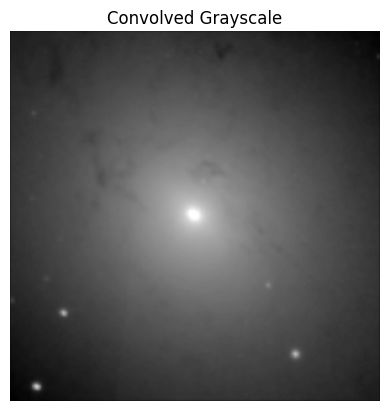

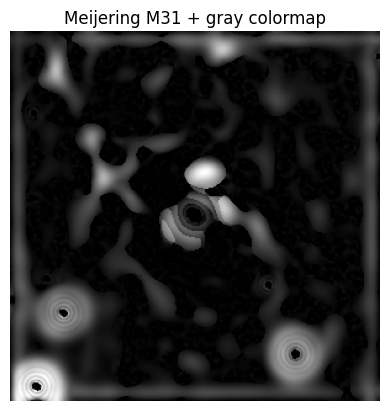

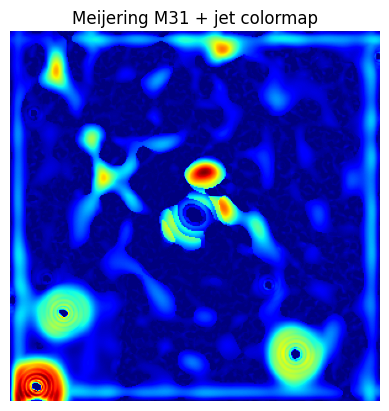

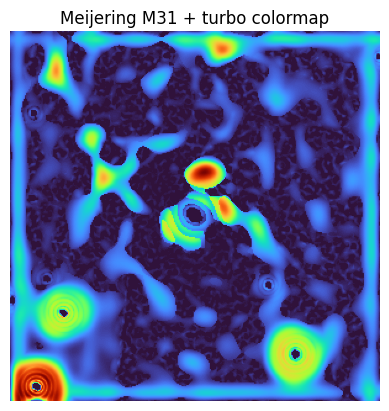

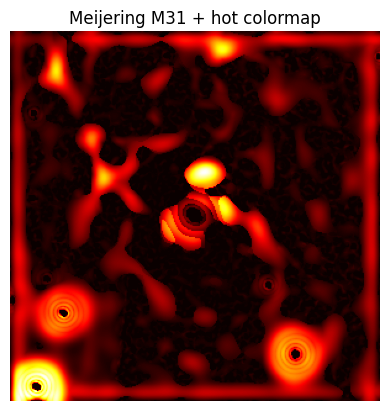

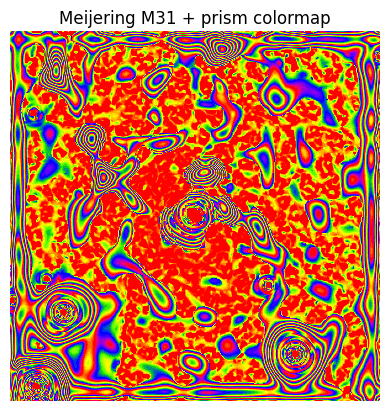

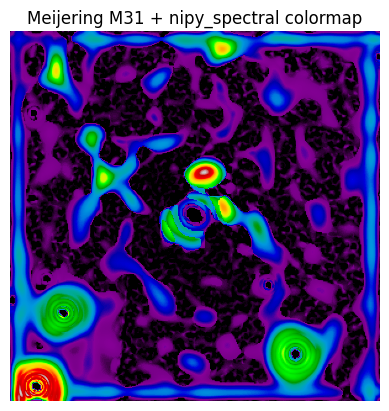

In [87]:
# For each element in the spectral list visulize the output for the meijering filer!
plt.imshow(convolved_grayscale, cmap='gray', origin='lower')
plt.title(f'Convolved Grayscale')
plt.axis('off')
plt.show()

for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap=colormap, origin='lower')
  plt.title(f'Meijering M31 + {colormap} colormap')
  plt.axis('off')
  plt.show() 

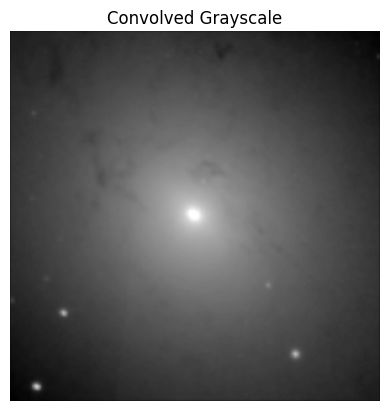

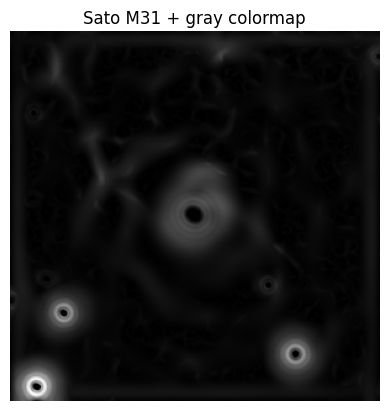

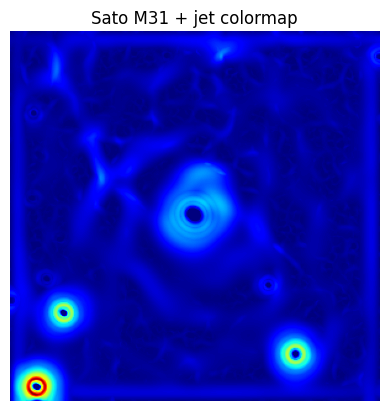

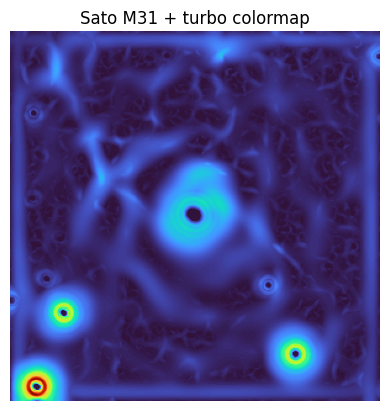

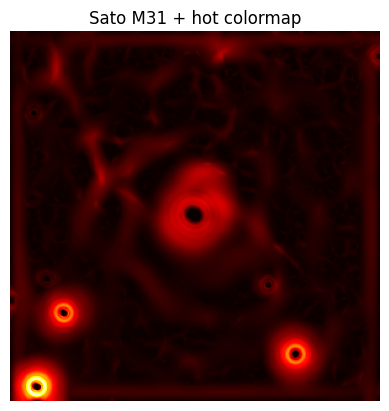

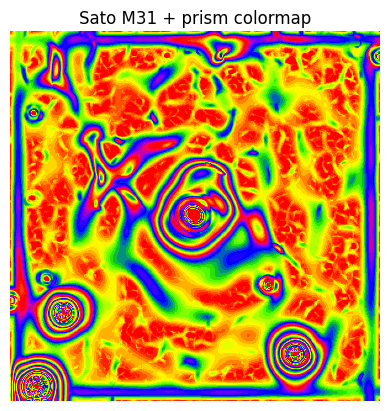

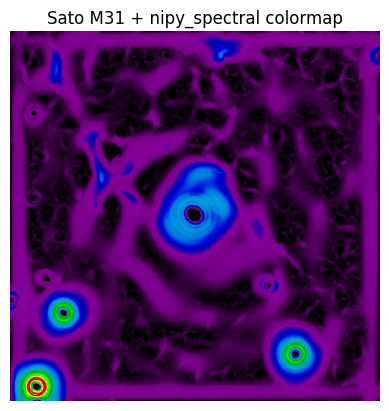

In [88]:
# For each element in the spectral list visulize the output for the sato filer!
plt.imshow(convolved_grayscale, cmap='gray', origin='lower')
plt.title(f'Convolved Grayscale')
plt.axis('off')
plt.show()

for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap=colormap, origin='lower')
  plt.title(f'Sato M31 + {colormap} colormap')
  plt.axis('off')
  plt.show() 

## Feature Detection and Extraction

skiamge different features:- https://scikit-image.org/docs/stable/api/skimage.feature.html

Skimage Feature used for Feature detection and extraction, e.g., texture analysis corners, etc.

### corner_foerstner

A fast operator for detection and precise location of distinct points, corners and centres of circular features

In [89]:
# Import feature module from skimage
from skimage.feature import corner_foerstner

In [90]:
# log_scaled pixels or standard scale pixes or Normalized pixels
feature_output = corner_foerstner(convolved_grayscale)

In [91]:
# Check the output of the featured image
feature_output[1]

array([[0.4989641 , 0.21946652, 0.20260812, ..., 0.24883013, 0.65938198,
        0.71467819],
       [0.39800763, 0.23215066, 0.14497339, ..., 0.54766745, 0.90813068,
        0.66235114],
       [0.24457695, 0.17733225, 0.10416085, ..., 0.98735337, 0.55825765,
        0.25356002],
       ...,
       [0.22429728, 0.51726484, 0.96709646, ..., 0.6867379 , 0.62290977,
        0.29146722],
       [0.64334682, 0.9009524 , 0.55832027, ..., 0.49465811, 0.75665701,
        0.5648419 ],
       [0.71794373, 0.66759447, 0.2532344 , ..., 0.24465286, 0.53700323,
        0.60483135]])

In [92]:
# Type of the featured image
type(feature_output)

tuple

In [93]:
# Check the length of the tuple
len(feature_output)

2

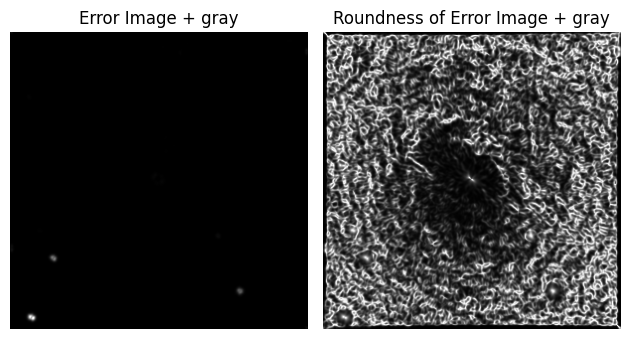

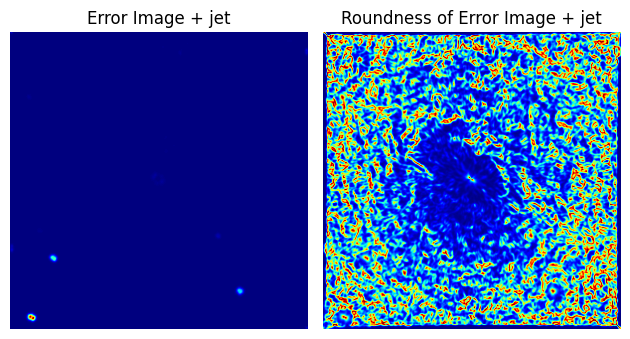

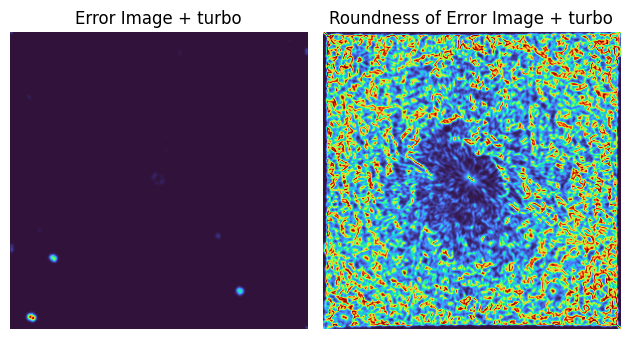

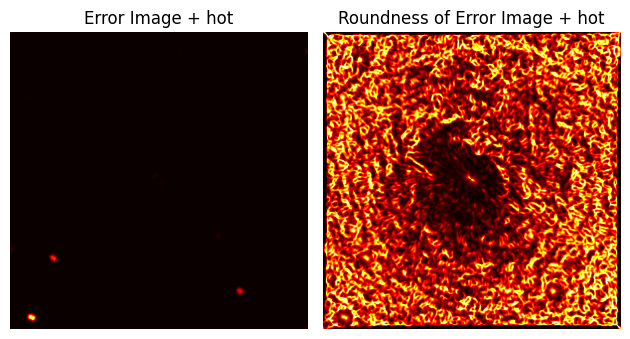

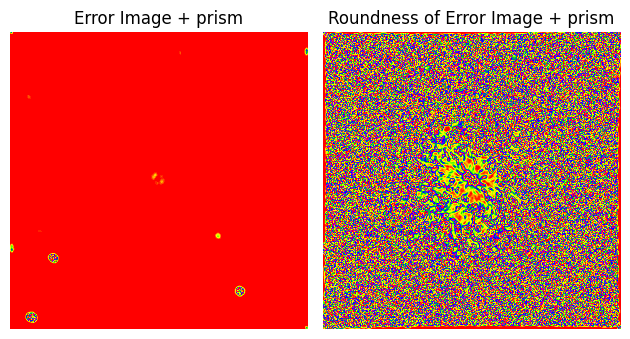

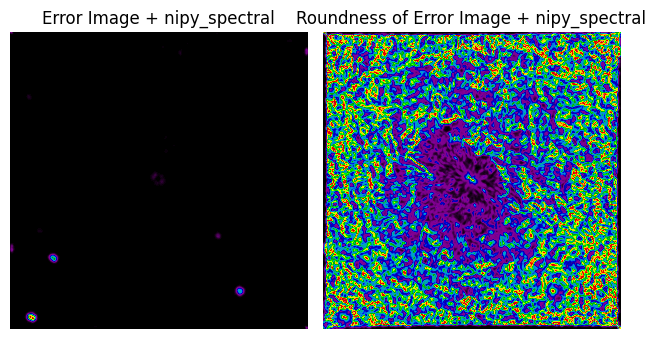

In [94]:
# Subplot Visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap=colormap, origin='lower')
  plt.title(f'Error Image + {colormap}')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap=colormap, origin='lower')
  plt.title(f'Roundness of Error Image + {colormap}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

### multiscale_basic_features (Local Features)

In [95]:
# Import this feature
from skimage.feature import multiscale_basic_features

In [96]:
# Generate again a new featured image
featured_image = multiscale_basic_features(convolved_grayscale)

In [97]:
# Get type
type(featured_image)

numpy.ndarray

In [98]:
# Shape
featured_image.shape

(300, 300, 24)

In [99]:
# Storing each and every channel from P1 to P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

In [100]:
# Check P1
P1.shape

(300, 300)

In [101]:
# What about last one - P24
P24.shape

(300, 300)

In [102]:
# Create list of these pixels for each channel
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

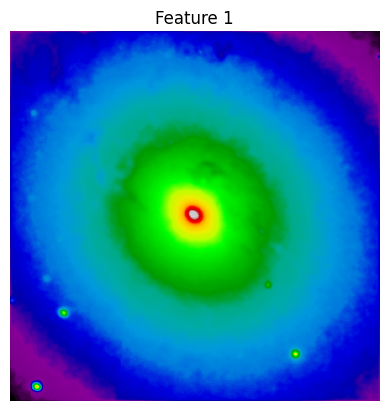

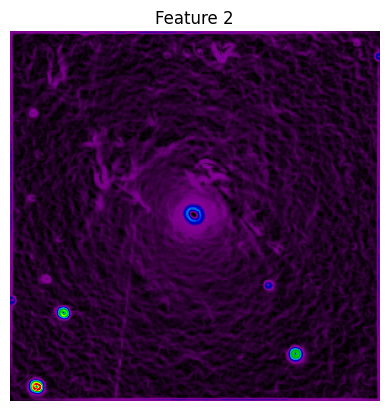

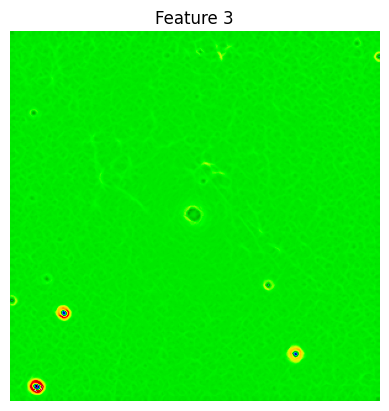

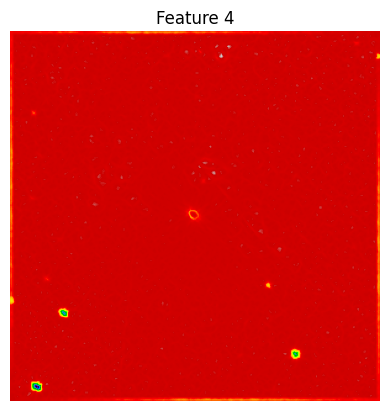

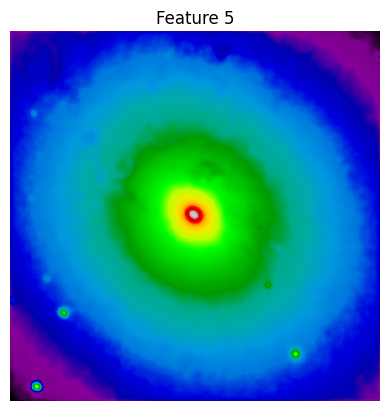

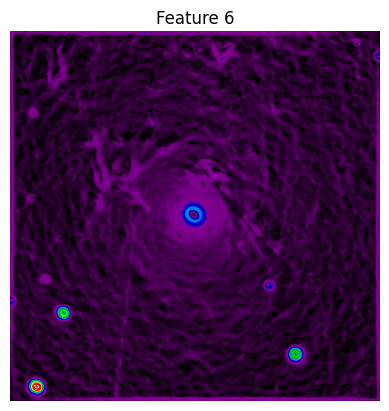

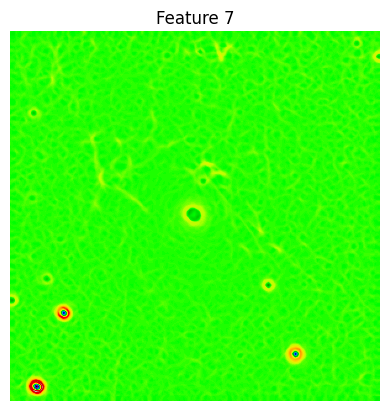

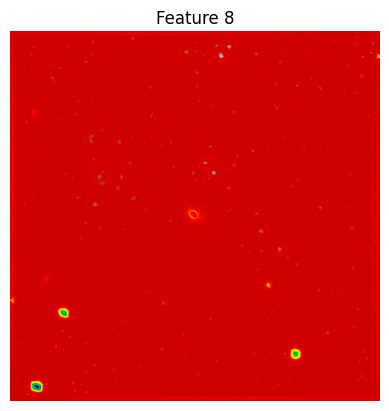

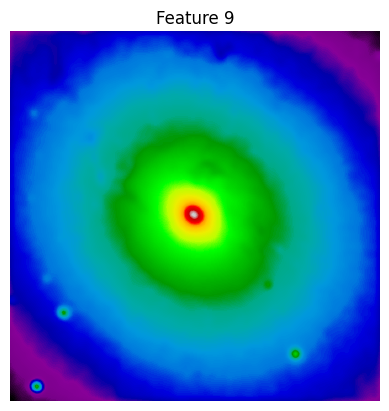

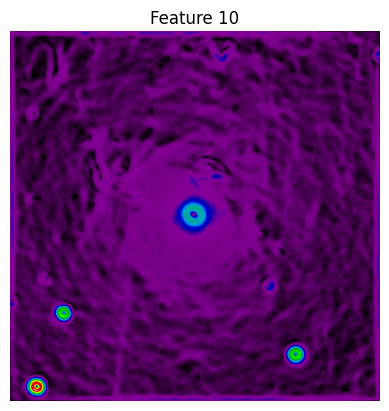

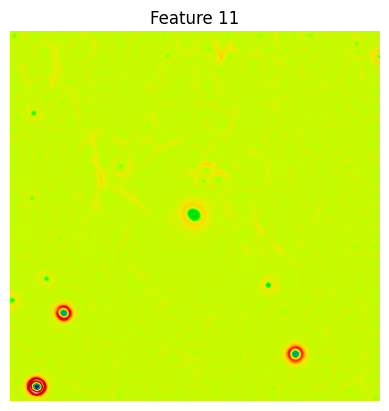

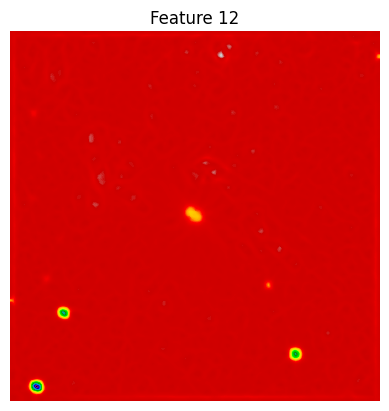

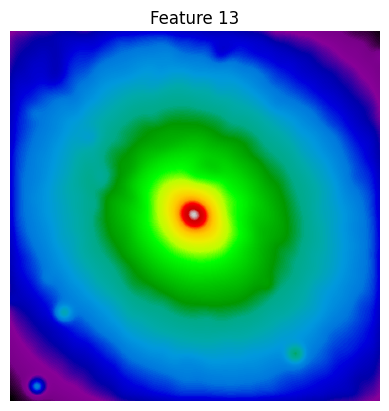

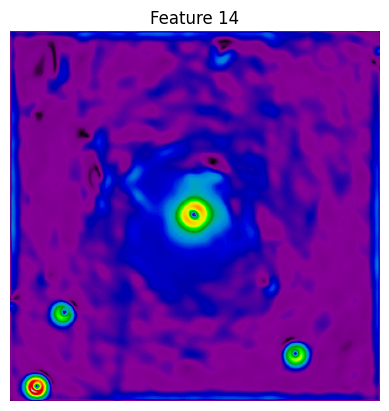

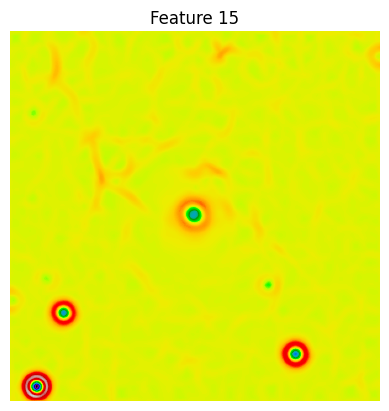

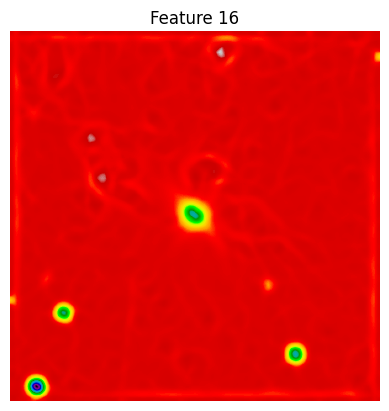

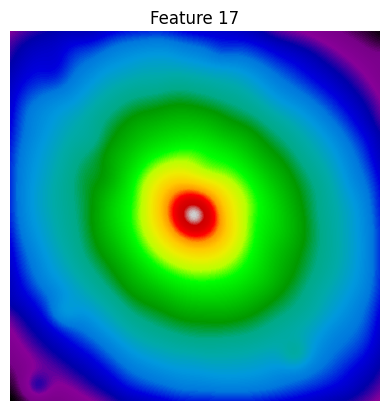

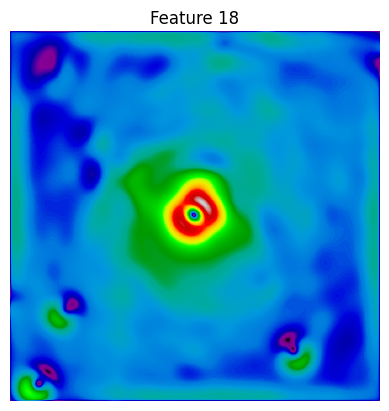

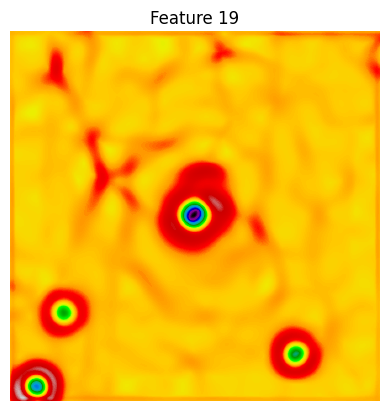

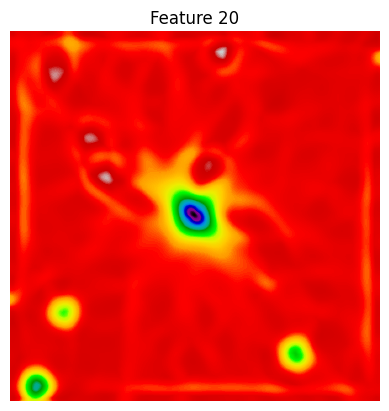

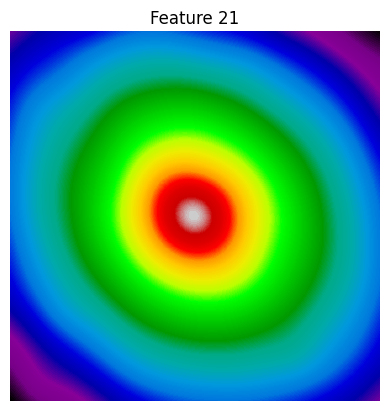

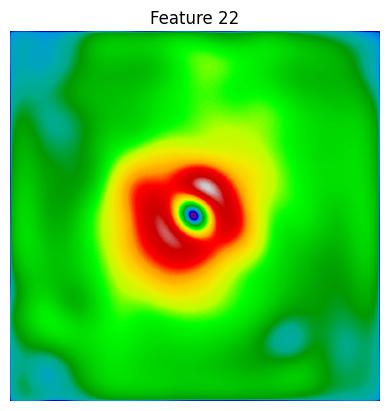

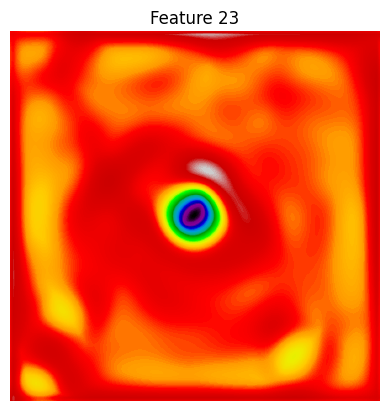

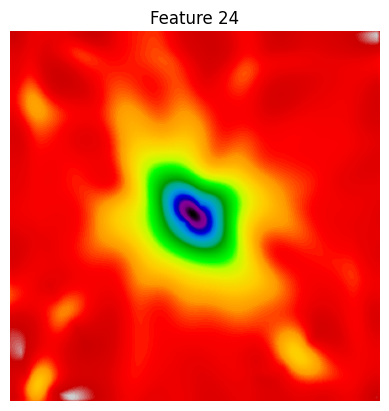

In [105]:
# Visualize each channel using prism spectral
colormap = 'nipy_spectral' # 'prism'
for i, feature_image in enumerate(Pixels):
  plt.imshow(feature_image, cmap=colormap, origin='lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show() 